#
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Prophet

In [1]:
from prophet import Prophet

In [2]:
from pandas import read_csv
 
path = 'monthly-car-sales.csv'
df   = read_csv(path, header=0) 

print(df.shape) 
print(df.head())

(108, 2)
     Month  Sales
0  1960-01   6550
1  1960-02   8728
2  1960-03  12026
3  1960-04  14395
4  1960-05  14587


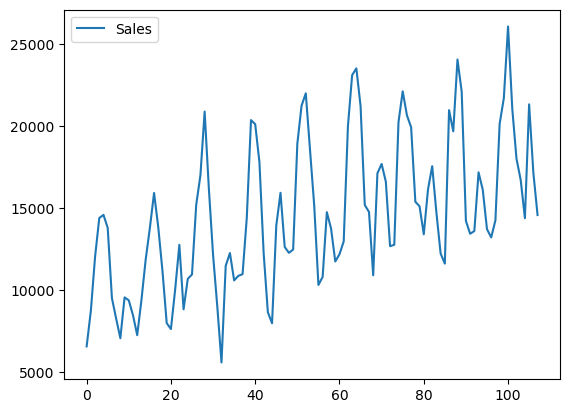

In [3]:
# plot the time series
from matplotlib import pyplot 
df.plot()
pyplot.show()

In [4]:
# prepare expected column names
from pandas import to_datetime
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])

In [5]:
# define the model
model = Prophet() 
# fit the model
model.fit(df)

06:21:59 - cmdstanpy - INFO - Chain [1] start processing
06:21:59 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
# Make an In-Sample Forecast

In [7]:
# define the period for which we want a prediction 
from pandas import DataFrame
future = list()
for i in range(1, 13):
    date = '1968-%02d' % i
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
future

,ds
0,1968-01-01
1,1968-02-01
2,1968-03-01
3,1968-04-01
4,1968-05-01
5,1968-06-01
6,1968-07-01
7,1968-08-01
8,1968-09-01
9,1968-10-01


In [8]:
import numpy as np
forecast = np.round( model.predict(future), 0 )

In [9]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds     yhat  yhat_lower  yhat_upper
0 1968-01-01  14368.0     12881.0     15931.0
1 1968-02-01  14932.0     13417.0     16530.0
2 1968-03-01  20884.0     19314.0     22538.0
3 1968-04-01  22909.0     21207.0     24375.0
4 1968-05-01  24203.0     22661.0     25791.0


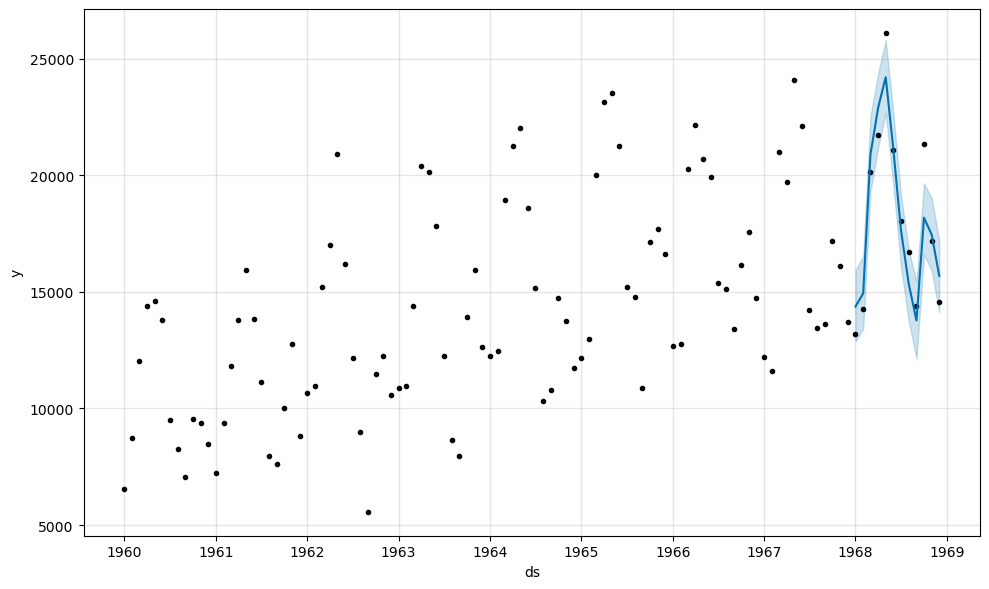

In [10]:
# plot forecast
model.plot(forecast)
pyplot.show()

In [11]:
# Make an Out-of-Sample Forecast

In [12]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
    date = '1969-%02d' % i
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

          ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  15425.481866  13953.941719  17011.379753
1 1969-02-01  16194.272433  14604.380649  17819.663507
2 1969-03-01  21393.067599  19741.034516  23010.008000
3 1969-04-01  23520.449776  21988.784928  25032.478454
4 1969-05-01  25028.910453  23422.254893  26520.379279


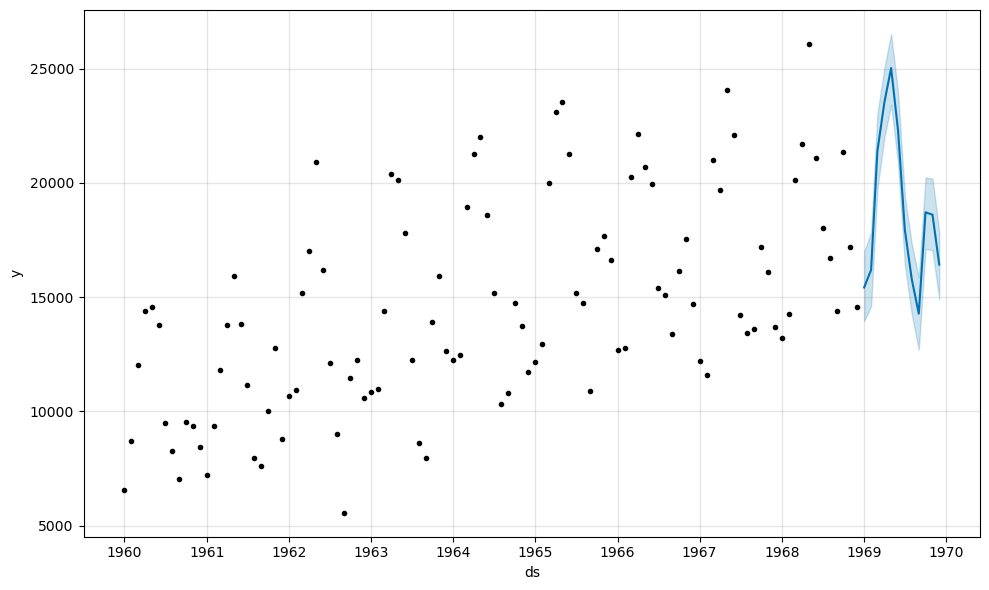

In [13]:
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

In [14]:
# Manually Evaluate Forecast Model

In [15]:
# create test dataset, remove last 12 months
train = df.drop(df.index[-12:])
print(train.tail())

           ds      y
91 1967-08-01  13434
92 1967-09-01  13598
93 1967-10-01  17187
94 1967-11-01  16119
95 1967-12-01  13713


In [16]:
# calculate MAE between expected and predicted values for december

from sklearn.metrics import mean_absolute_error

y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 1375.377


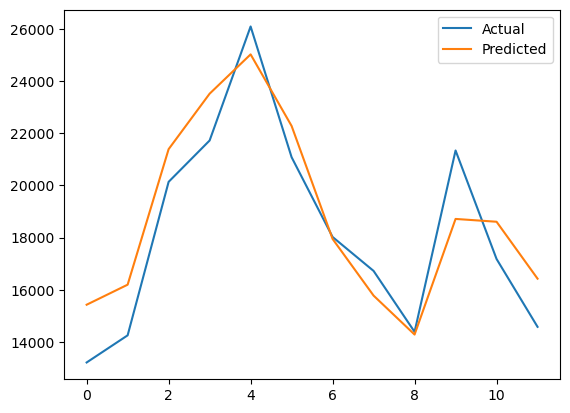

In [17]:
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

# 
# 
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> LSTM
 - LSTM with Regression Framing
 - LSTM with Window Regression Framing
 - LSTM with Time Step Regression Framing
 - LSTM with Memory
 - Stacked LSTMs with Memory Between Batches

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> LSTM with Regression Framing

Epoch 1/100
70/70 - 2s - loss: 0.2039 - 2s/epoch - 34ms/step
Epoch 2/100
70/70 - 0s - loss: 0.1376 - 144ms/epoch - 2ms/step
Epoch 3/100
70/70 - 0s - loss: 0.0924 - 139ms/epoch - 2ms/step
Epoch 4/100
70/70 - 0s - loss: 0.0631 - 140ms/epoch - 2ms/step
Epoch 5/100
70/70 - 0s - loss: 0.0485 - 143ms/epoch - 2ms/step
Epoch 6/100
70/70 - 0s - loss: 0.0426 - 174ms/epoch - 2ms/step
Epoch 7/100
70/70 - 0s - loss: 0.0404 - 161ms/epoch - 2ms/step
Epoch 8/100
70/70 - 0s - loss: 0.0389 - 167ms/epoch - 2ms/step
Epoch 9/100
70/70 - 0s - loss: 0.0379 - 162ms/epoch - 2ms/step
Epoch 10/100
70/70 - 0s - loss: 0.0370 - 164ms/epoch - 2ms/step
Epoch 11/100
70/70 - 0s - loss: 0.0361 - 162ms/epoch - 2ms/step
Epoch 12/100
70/70 - 0s - loss: 0.0353 - 167ms/epoch - 2ms/step
Epoch 13/100
70/70 - 0s - loss: 0.0345 - 173ms/epoch - 2ms/step
Epoch 14/100
70/70 - 0s - loss: 0.0339 - 167ms/epoch - 2ms/step
Epoch 15/100
70/70 - 0s - loss: 0.0331 - 137ms/epoch - 2ms/step
Epoch 16/100
70/70 - 0s - loss: 0.0327 - 166ms/epoc

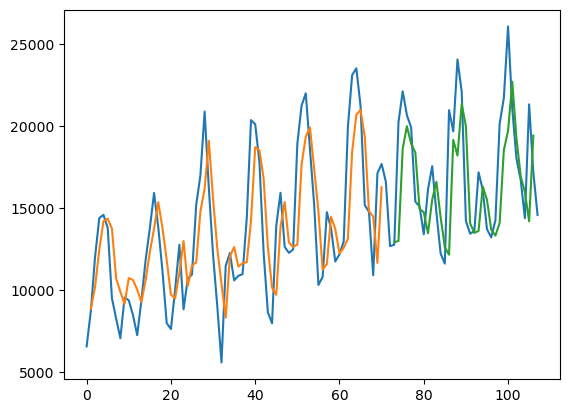

In [18]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('monthly-car-sales.csv#
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Prophet', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> LSTM with Window Regression Framing

Epoch 1/100
68/68 - 2s - loss: 0.1106 - 2s/epoch - 32ms/step
Epoch 2/100
68/68 - 0s - loss: 0.0649 - 169ms/epoch - 2ms/step
Epoch 3/100
68/68 - 0s - loss: 0.0453 - 175ms/epoch - 3ms/step
Epoch 4/100
68/68 - 0s - loss: 0.0394 - 146ms/epoch - 2ms/step
Epoch 5/100
68/68 - 0s - loss: 0.0378 - 146ms/epoch - 2ms/step
Epoch 6/100
68/68 - 0s - loss: 0.0369 - 161ms/epoch - 2ms/step
Epoch 7/100
68/68 - 0s - loss: 0.0362 - 151ms/epoch - 2ms/step
Epoch 8/100
68/68 - 0s - loss: 0.0361 - 144ms/epoch - 2ms/step
Epoch 9/100
68/68 - 0s - loss: 0.0354 - 177ms/epoch - 3ms/step
Epoch 10/100
68/68 - 0s - loss: 0.0345 - 161ms/epoch - 2ms/step
Epoch 11/100
68/68 - 0s - loss: 0.0345 - 167ms/epoch - 2ms/step
Epoch 12/100
68/68 - 0s - loss: 0.0339 - 149ms/epoch - 2ms/step
Epoch 13/100
68/68 - 0s - loss: 0.0331 - 157ms/epoch - 2ms/step
Epoch 14/100
68/68 - 0s - loss: 0.0325 - 149ms/epoch - 2ms/step
Epoch 15/100
68/68 - 0s - loss: 0.0320 - 165ms/epoch - 2ms/step
Epoch 16/100
68/68 - 0s - loss: 0.0316 - 153ms/epoc

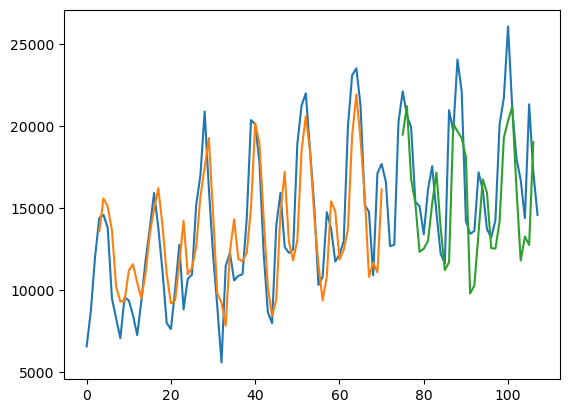

In [38]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('monthly-car-sales.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> LSTM with Time Step Regression Framing

Epoch 1/100
68/68 - 2s - loss: 0.1505 - 2s/epoch - 34ms/step
Epoch 2/100
68/68 - 0s - loss: 0.0683 - 134ms/epoch - 2ms/step
Epoch 3/100
68/68 - 0s - loss: 0.0401 - 134ms/epoch - 2ms/step
Epoch 4/100
68/68 - 0s - loss: 0.0374 - 135ms/epoch - 2ms/step
Epoch 5/100
68/68 - 0s - loss: 0.0371 - 140ms/epoch - 2ms/step
Epoch 6/100
68/68 - 0s - loss: 0.0367 - 137ms/epoch - 2ms/step
Epoch 7/100
68/68 - 0s - loss: 0.0362 - 139ms/epoch - 2ms/step
Epoch 8/100
68/68 - 0s - loss: 0.0366 - 135ms/epoch - 2ms/step
Epoch 9/100
68/68 - 0s - loss: 0.0362 - 137ms/epoch - 2ms/step
Epoch 10/100
68/68 - 0s - loss: 0.0353 - 167ms/epoch - 2ms/step
Epoch 11/100
68/68 - 0s - loss: 0.0361 - 160ms/epoch - 2ms/step
Epoch 12/100
68/68 - 0s - loss: 0.0359 - 159ms/epoch - 2ms/step
Epoch 13/100
68/68 - 0s - loss: 0.0351 - 156ms/epoch - 2ms/step
Epoch 14/100
68/68 - 0s - loss: 0.0349 - 184ms/epoch - 3ms/step
Epoch 15/100
68/68 - 0s - loss: 0.0347 - 155ms/epoch - 2ms/step
Epoch 16/100
68/68 - 0s - loss: 0.0347 - 166ms/epoc

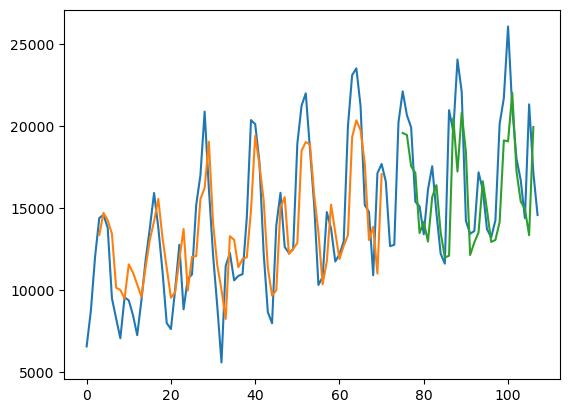

In [20]:
# LSTM for international airline passengers problem with time step regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('monthly-car-sales.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> LSTM with Memory

68/68 - 2s - loss: 0.0709 - 2s/epoch - 31ms/step
68/68 - 0s - loss: 0.0342 - 137ms/epoch - 2ms/step
68/68 - 0s - loss: 0.0338 - 135ms/epoch - 2ms/step
68/68 - 0s - loss: 0.0336 - 140ms/epoch - 2ms/step
68/68 - 0s - loss: 0.0329 - 138ms/epoch - 2ms/step
68/68 - 0s - loss: 0.0321 - 136ms/epoch - 2ms/step
68/68 - 0s - loss: 0.0314 - 135ms/epoch - 2ms/step
68/68 - 0s - loss: 0.0307 - 138ms/epoch - 2ms/step
68/68 - 0s - loss: 0.0299 - 140ms/epoch - 2ms/step
68/68 - 0s - loss: 0.0292 - 138ms/epoch - 2ms/step
68/68 - 0s - loss: 0.0285 - 138ms/epoch - 2ms/step
68/68 - 0s - loss: 0.0277 - 135ms/epoch - 2ms/step
68/68 - 0s - loss: 0.0270 - 137ms/epoch - 2ms/step
68/68 - 0s - loss: 0.0263 - 137ms/epoch - 2ms/step
68/68 - 0s - loss: 0.0257 - 136ms/epoch - 2ms/step
68/68 - 0s - loss: 0.0250 - 138ms/epoch - 2ms/step
68/68 - 0s - loss: 0.0244 - 135ms/epoch - 2ms/step
68/68 - 0s - loss: 0.0239 - 138ms/epoch - 2ms/step
68/68 - 0s - loss: 0.0234 - 138ms/epoch - 2ms/step
68/68 - 0s - loss: 0.0230 - 136ms

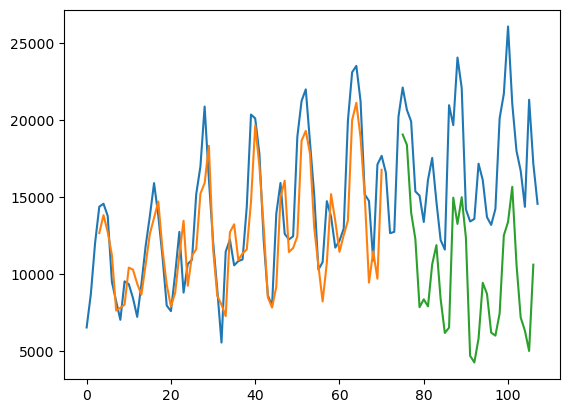

In [21]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('monthly-car-sales.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Stacked LSTMs with Memory Between Batches

68/68 - 4s - loss: 0.0951 - 4s/epoch - 56ms/step
68/68 - 0s - loss: 0.0502 - 246ms/epoch - 4ms/step
68/68 - 0s - loss: 0.0476 - 243ms/epoch - 4ms/step
68/68 - 1s - loss: 0.0472 - 518ms/epoch - 8ms/step
68/68 - 0s - loss: 0.0467 - 204ms/epoch - 3ms/step
68/68 - 0s - loss: 0.0464 - 207ms/epoch - 3ms/step
68/68 - 0s - loss: 0.0460 - 206ms/epoch - 3ms/step
68/68 - 0s - loss: 0.0457 - 205ms/epoch - 3ms/step
68/68 - 0s - loss: 0.0453 - 204ms/epoch - 3ms/step
68/68 - 0s - loss: 0.0450 - 204ms/epoch - 3ms/step
68/68 - 0s - loss: 0.0447 - 204ms/epoch - 3ms/step
68/68 - 0s - loss: 0.0443 - 205ms/epoch - 3ms/step
68/68 - 0s - loss: 0.0439 - 205ms/epoch - 3ms/step
68/68 - 0s - loss: 0.0435 - 249ms/epoch - 4ms/step
68/68 - 0s - loss: 0.0431 - 242ms/epoch - 4ms/step
68/68 - 0s - loss: 0.0426 - 240ms/epoch - 4ms/step
68/68 - 0s - loss: 0.0422 - 254ms/epoch - 4ms/step
68/68 - 0s - loss: 0.0416 - 213ms/epoch - 3ms/step
68/68 - 0s - loss: 0.0411 - 203ms/epoch - 3ms/step
68/68 - 0s - loss: 0.0406 - 220ms

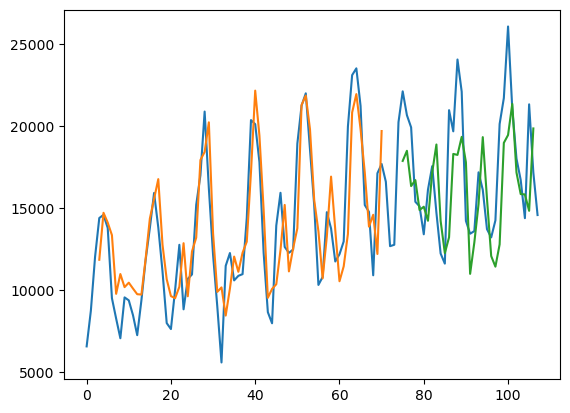

In [22]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('monthly-car-sales.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#   

#    
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Multi-Step LSTM Time Series Forecasting Models 
 - Univariate Multi-Step LSTM
 - Univariate Multi-Step Encoder-Decoder LSTM
 - Multivariate Multi-Step Encoder-Decoder LSTM
 - Univariate Multi-Step Encoder-Decoder CNN-LSTM
 - Univariate Multi-Step Encoder-Decoder ConvLSTM

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> LSTM Model With Univariate Input and Vector Output<Br>( Univariate Multi-Step LSTM )

C:\Users\EZ-Tech\AppData\Local\Temp\ipykernel_14512\2795978225.py:121: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset = read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])


lstm: [399.605] 413.7, 404.7, 385.4, 395.5, 399.9, 320.9, 463.7


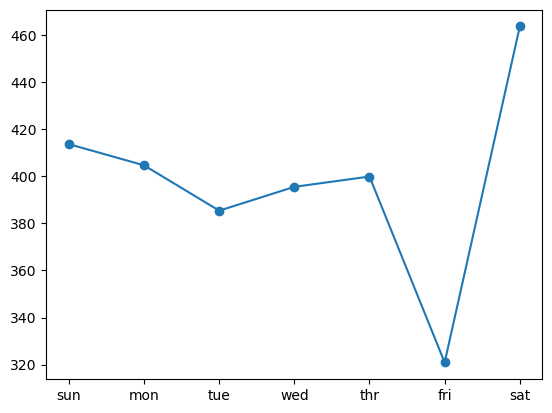

In [23]:

from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM

# split a univariate dataset into train/test sets
def split_dataset(data):
	# split into standard weeks
	train, test = data[1:-328], data[-328:-6]
	# restructure into windows of weekly data
	train = array(split(train, len(train)/7))
	test = array(split(test, len(test)/7))
	return train, test

# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
	scores = list()
	# calculate an RMSE score for each day
	for i in range(actual.shape[1]):
		# calculate mse
		mse = mean_squared_error(actual[:, i], predicted[:, i])
		# calculate rmse
		rmse = sqrt(mse)
		# store
		scores.append(rmse)
	# calculate overall RMSE
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = sqrt(s / (actual.shape[0] * actual.shape[1]))
	return score, scores

# summarize scores
def summarize_scores(name, score, scores):
	s_scores = ', '.join(['%.1f' % s for s in scores])
	print('%s: [%.3f] %s' % (name, score, s_scores))

# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=7):
	# flatten data
	data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
	X, y = list(), list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end <= len(data):
			x_input = data[in_start:in_end, 0]
			x_input = x_input.reshape((len(x_input), 1))
			X.append(x_input)
			y.append(data[in_end:out_end, 0])
		# move along one time step
		in_start += 1
	return array(X), array(y)

# train the model
def build_model(train, n_input):
	# prepare data
	train_x, train_y = to_supervised(train, n_input)
	# define parameters
	verbose, epochs, batch_size = 0, 70, 16
	n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
	# define model
	model = Sequential()
	model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs))
	model.compile(loss='mse', optimizer='adam')
	# fit network
	model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
	return model

# make a forecast
def forecast(model, history, n_input):
	# flatten data
	data = array(history)
	data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
	# retrieve last observations for input data
	input_x = data[-n_input:, 0]
	# reshape into [1, n_input, 1]
	input_x = input_x.reshape((1, len(input_x), 1))
	# forecast the next week
	yhat = model.predict(input_x, verbose=0)
	# we only want the vector forecast
	yhat = yhat[0]
	return yhat

# evaluate a single model
def evaluate_model(train, test, n_input):
	# fit model
	model = build_model(train, n_input)
	# history is a list of weekly data
	history = [x for x in train]
	# walk-forward validation over each week
	predictions = list()
	for i in range(len(test)):
		# predict the week
		yhat_sequence = forecast(model, history, n_input)
		# store the predictions
		predictions.append(yhat_sequence)
		# get real observation and add to history for predicting the next week
		history.append(test[i, :])
	# evaluate predictions days for each week
	predictions = array(predictions)
	score, scores = evaluate_forecasts(test[:, :, 0], predictions)
	return score, scores

# load the new file
dataset = read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# split into train and test
train, test = split_dataset(dataset.values)
# evaluate model and get scores
n_input = 7 # 7, 14, ...
score, scores = evaluate_model(train, test, n_input)
# summarize scores
summarize_scores('lstm', score, scores)
# plot scores
days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
pyplot.plot(days, scores, marker='o', label='lstm')
pyplot.show()

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Encoder-Decoder LSTM Model With Univariate Input<Br>( Univariate Multi-Step Encoder-Decoder LSTM )

C:\Users\EZ-Tech\AppData\Local\Temp\ipykernel_14512\3322103853.py:127: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset = read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])


lstm: [377.996] 370.7, 390.5, 338.0, 380.9, 373.1, 325.1, 453.9


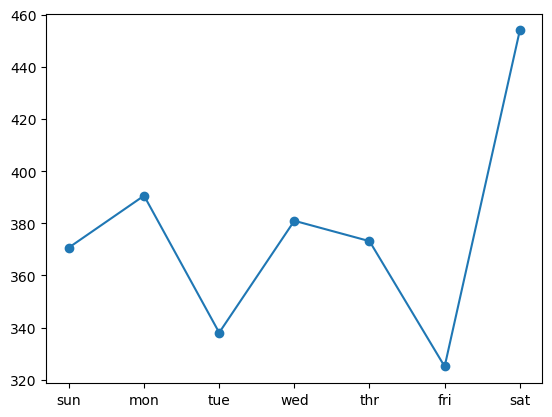

In [24]:
# importing libraries
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

# split a univariate dataset into train/test sets
def split_dataset(data):
	# split into standard weeks
	train, test = data[1:-328], data[-328:-6]
	# restructure into windows of weekly data
	train = array(split(train, len(train)/7))
	test = array(split(test, len(test)/7))
	return train, test

# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
	scores = list()
	# calculate an RMSE score for each day
	for i in range(actual.shape[1]):
		# calculate mse
		mse = mean_squared_error(actual[:, i], predicted[:, i])
		# calculate rmse
		rmse = sqrt(mse)
		# store
		scores.append(rmse)
	# calculate overall RMSE
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = sqrt(s / (actual.shape[0] * actual.shape[1]))
	return score, scores

# summarize scores
def summarize_scores(name, score, scores):
	s_scores = ', '.join(['%.1f' % s for s in scores])
	print('%s: [%.3f] %s' % (name, score, s_scores))

# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=7):
	# flatten data
	data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
	X, y = list(), list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end <= len(data):
			x_input = data[in_start:in_end, 0]
			x_input = x_input.reshape((len(x_input), 1))
			X.append(x_input)
			y.append(data[in_end:out_end, 0])
		# move along one time step
		in_start += 1
	return array(X), array(y)

# train the model
def build_model(train, n_input):
	# prepare data
	train_x, train_y = to_supervised(train, n_input)
	# define parameters
	verbose, epochs, batch_size = 0, 20, 16
	n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
	# reshape output into [samples, timesteps, features]
	train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
	# define model
	model = Sequential()
	model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
	model.add(RepeatVector(n_outputs))
	model.add(LSTM(200, activation='relu', return_sequences=True))
	model.add(TimeDistributed(Dense(100, activation='relu')))
	model.add(TimeDistributed(Dense(1)))
	model.compile(loss='mse', optimizer='adam')
	# fit network
	model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
	return model

# make a forecast
def forecast(model, history, n_input):
	# flatten data
	data = array(history)
	data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
	# retrieve last observations for input data
	input_x = data[-n_input:, 0]
	# reshape into [1, n_input, 1]
	input_x = input_x.reshape((1, len(input_x), 1))
	# forecast the next week
	yhat = model.predict(input_x, verbose=0)
	# we only want the vector forecast
	yhat = yhat[0]
	return yhat

# evaluate a single model
def evaluate_model(train, test, n_input):
	# fit model
	model = build_model(train, n_input)
	# history is a list of weekly data
	history = [x for x in train]
	# walk-forward validation over each week
	predictions = list()
	for i in range(len(test)):
		# predict the week
		yhat_sequence = forecast(model, history, n_input)
		# store the predictions
		predictions.append(yhat_sequence)
		# get real observation and add to history for predicting the next week
		history.append(test[i, :])
	# evaluate predictions days for each week
	predictions = array(predictions)
	score, scores = evaluate_forecasts(test[:, :, 0], predictions)
	return score, scores

# load the new file
dataset = read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# split into train and test
train, test = split_dataset(dataset.values)
# evaluate model and get scores
n_input = 14
score, scores = evaluate_model(train, test, n_input)
# summarize scores
summarize_scores('lstm', score, scores)
# plot scores
days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
pyplot.plot(days, scores, marker='o', label='lstm')
pyplot.show()

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Encoder-Decoder LSTM Model With Multivariate Input<Br>( Multivariate Multi-Step Encoder-Decoder LSTM )

C:\Users\EZ-Tech\AppData\Local\Temp\ipykernel_14512\3700573996.py:125: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset = read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])


lstm: [377.043] 380.0, 379.7, 327.6, 392.1, 375.3, 306.6, 459.0


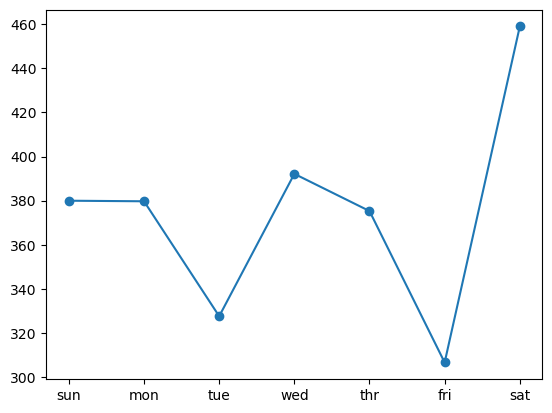

In [25]:
# importing libraries
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

# split a univariate dataset into train/test sets
def split_dataset(data):
	# split into standard weeks
	train, test = data[1:-328], data[-328:-6]
	# restructure into windows of weekly data
	train = array(split(train, len(train)/7))
	test = array(split(test, len(test)/7))
	return train, test

# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
	scores = list()
	# calculate an RMSE score for each day
	for i in range(actual.shape[1]):
		# calculate mse
		mse = mean_squared_error(actual[:, i], predicted[:, i])
		# calculate rmse
		rmse = sqrt(mse)
		# store
		scores.append(rmse)
	# calculate overall RMSE
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = sqrt(s / (actual.shape[0] * actual.shape[1]))
	return score, scores

# summarize scores
def summarize_scores(name, score, scores):
	s_scores = ', '.join(['%.1f' % s for s in scores])
	print('%s: [%.3f] %s' % (name, score, s_scores))

# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=7):
	# flatten data
	data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
	X, y = list(), list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end <= len(data):
			X.append(data[in_start:in_end, :])
			y.append(data[in_end:out_end, 0])
		# move along one time step
		in_start += 1
	return array(X), array(y)

# train the model
def build_model(train, n_input):
	# prepare data
	train_x, train_y = to_supervised(train, n_input)
	# define parameters
	verbose, epochs, batch_size = 0, 50, 16
	n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
	# reshape output into [samples, timesteps, features]
	train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
	# define model
	model = Sequential()
	model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
	model.add(RepeatVector(n_outputs))
	model.add(LSTM(200, activation='relu', return_sequences=True))
	model.add(TimeDistributed(Dense(100, activation='relu')))
	model.add(TimeDistributed(Dense(1)))
	model.compile(loss='mse', optimizer='adam')
	# fit network
	model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
	return model

# make a forecast
def forecast(model, history, n_input):
	# flatten data
	data = array(history)
	data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
	# retrieve last observations for input data
	input_x = data[-n_input:, :]
	# reshape into [1, n_input, n]
	input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
	# forecast the next week
	yhat = model.predict(input_x, verbose=0)
	# we only want the vector forecast
	yhat = yhat[0]
	return yhat

# evaluate a single model
def evaluate_model(train, test, n_input):
	# fit model
	model = build_model(train, n_input)
	# history is a list of weekly data
	history = [x for x in train]
	# walk-forward validation over each week
	predictions = list()
	for i in range(len(test)):
		# predict the week
		yhat_sequence = forecast(model, history, n_input)
		# store the predictions
		predictions.append(yhat_sequence)
		# get real observation and add to history for predicting the next week
		history.append(test[i, :])
	# evaluate predictions days for each week
	predictions = array(predictions)
	score, scores = evaluate_forecasts(test[:, :, 0], predictions)
	return score, scores

# load the new file
dataset = read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# split into train and test
train, test = split_dataset(dataset.values)
# evaluate model and get scores
n_input = 14
score, scores = evaluate_model(train, test, n_input)
# summarize scores
summarize_scores('lstm', score, scores)
# plot scores
days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
pyplot.plot(days, scores, marker='o', label='lstm')
pyplot.show()

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> CNN-LSTM Encoder-Decoder Model With Univariate Input<Br>( Univariate Multi-Step Encoder-Decoder CNN-LSTM )

C:\Users\EZ-Tech\AppData\Local\Temp\ipykernel_14512\2016158436.py:132: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset = read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])


lstm: [376.816] 372.0, 392.0, 334.5, 375.9, 366.7, 321.7, 459.0


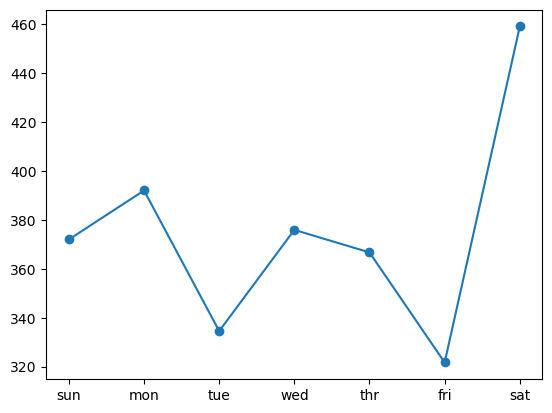

In [26]:
# importing libraries
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# split a univariate dataset into train/test sets
def split_dataset(data):
	# split into standard weeks
	train, test = data[1:-328], data[-328:-6]
	# restructure into windows of weekly data
	train = array(split(train, len(train)/7))
	test = array(split(test, len(test)/7))
	return train, test

# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
	scores = list()
	# calculate an RMSE score for each day
	for i in range(actual.shape[1]):
		# calculate mse
		mse = mean_squared_error(actual[:, i], predicted[:, i])
		# calculate rmse
		rmse = sqrt(mse)
		# store
		scores.append(rmse)
	# calculate overall RMSE
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = sqrt(s / (actual.shape[0] * actual.shape[1]))
	return score, scores

# summarize scores
def summarize_scores(name, score, scores):
	s_scores = ', '.join(['%.1f' % s for s in scores])
	print('%s: [%.3f] %s' % (name, score, s_scores))

# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=7):
	# flatten data
	data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
	X, y = list(), list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end <= len(data):
			x_input = data[in_start:in_end, 0]
			x_input = x_input.reshape((len(x_input), 1))
			X.append(x_input)
			y.append(data[in_end:out_end, 0])
		# move along one time step
		in_start += 1
	return array(X), array(y)

# train the model
def build_model(train, n_input):
	# prepare data
	train_x, train_y = to_supervised(train, n_input)
	# define parameters
	verbose, epochs, batch_size = 0, 20, 16
	n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
	# reshape output into [samples, timesteps, features]
	train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
	# define model
	model = Sequential()
	model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
	model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
	model.add(MaxPooling1D(pool_size=2))
	model.add(Flatten())
	model.add(RepeatVector(n_outputs))
	model.add(LSTM(200, activation='relu', return_sequences=True))
	model.add(TimeDistributed(Dense(100, activation='relu')))
	model.add(TimeDistributed(Dense(1)))
	model.compile(loss='mse', optimizer='adam')
	# fit network
	model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
	return model

# make a forecast
def forecast(model, history, n_input):
	# flatten data
	data = array(history)
	data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
	# retrieve last observations for input data
	input_x = data[-n_input:, 0]
	# reshape into [1, n_input, 1]
	input_x = input_x.reshape((1, len(input_x), 1))
	# forecast the next week
	yhat = model.predict(input_x, verbose=0)
	# we only want the vector forecast
	yhat = yhat[0]
	return yhat

# evaluate a single model
def evaluate_model(train, test, n_input):
	# fit model
	model = build_model(train, n_input)
	# history is a list of weekly data
	history = [x for x in train]
	# walk-forward validation over each week
	predictions = list()
	for i in range(len(test)):
		# predict the week
		yhat_sequence = forecast(model, history, n_input)
		# store the predictions
		predictions.append(yhat_sequence)
		# get real observation and add to history for predicting the next week
		history.append(test[i, :])
	# evaluate predictions days for each week
	predictions = array(predictions)
	score, scores = evaluate_forecasts(test[:, :, 0], predictions)
	return score, scores

# load the new file
dataset = read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# split into train and test
train, test = split_dataset(dataset.values)
# evaluate model and get scores
n_input = 14
score, scores = evaluate_model(train, test, n_input)
# summarize scores
summarize_scores('lstm', score, scores)
# plot scores
days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
pyplot.plot(days, scores, marker='o', label='lstm')
pyplot.show()

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> ConvLSTM Encoder-Decoder Model With Univariate Input<Br>( Univariate Multi-Step Encoder-Decoder ConvLSTM )

C:\Users\EZ-Tech\AppData\Local\Temp\ipykernel_14512\905914522.py:131: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset = read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])


lstm: [384.599] 386.8, 415.5, 343.6, 374.3, 388.6, 322.8, 447.0


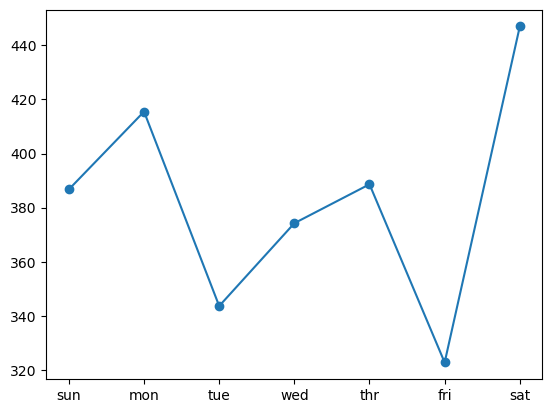

In [27]:
# importing libraries
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import ConvLSTM2D

# split a univariate dataset into train/test sets
def split_dataset(data):
	# split into standard weeks
	train, test = data[1:-328], data[-328:-6]
	# restructure into windows of weekly data
	train = array(split(train, len(train)/7))
	test = array(split(test, len(test)/7))
	return train, test

# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
	scores = list()
	# calculate an RMSE score for each day
	for i in range(actual.shape[1]):
		# calculate mse
		mse = mean_squared_error(actual[:, i], predicted[:, i])
		# calculate rmse
		rmse = sqrt(mse)
		# store
		scores.append(rmse)
	# calculate overall RMSE
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = sqrt(s / (actual.shape[0] * actual.shape[1]))
	return score, scores

# summarize scores
def summarize_scores(name, score, scores):
	s_scores = ', '.join(['%.1f' % s for s in scores])
	print('%s: [%.3f] %s' % (name, score, s_scores))

# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=7):
	# flatten data
	data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
	X, y = list(), list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end <= len(data):
			x_input = data[in_start:in_end, 0]
			x_input = x_input.reshape((len(x_input), 1))
			X.append(x_input)
			y.append(data[in_end:out_end, 0])
		# move along one time step
		in_start += 1
	return array(X), array(y)

# train the model
def build_model(train, n_steps, n_length, n_input):
	# prepare data
	train_x, train_y = to_supervised(train, n_input)
	# define parameters
	verbose, epochs, batch_size = 0, 20, 16
	n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
	# reshape into subsequences [samples, time steps, rows, cols, channels]
	train_x = train_x.reshape((train_x.shape[0], n_steps, 1, n_length, n_features))
	# reshape output into [samples, timesteps, features]
	train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
	# define model
	model = Sequential()
	model.add(ConvLSTM2D(filters=64, kernel_size=(1,3), activation='relu', input_shape=(n_steps, 1, n_length, n_features)))
	model.add(Flatten())
	model.add(RepeatVector(n_outputs))
	model.add(LSTM(200, activation='relu', return_sequences=True))
	model.add(TimeDistributed(Dense(100, activation='relu')))
	model.add(TimeDistributed(Dense(1)))
	model.compile(loss='mse', optimizer='adam')
	# fit network
	model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
	return model

# make a forecast
def forecast(model, history, n_steps, n_length, n_input):
	# flatten data
	data = array(history)
	data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
	# retrieve last observations for input data
	input_x = data[-n_input:, 0]
	# reshape into [samples, time steps, rows, cols, channels]
	input_x = input_x.reshape((1, n_steps, 1, n_length, 1))
	# forecast the next week
	yhat = model.predict(input_x, verbose=0)
	# we only want the vector forecast
	yhat = yhat[0]
	return yhat

# evaluate a single model
def evaluate_model(train, test, n_steps, n_length, n_input):
	# fit model
	model = build_model(train, n_steps, n_length, n_input)
	# history is a list of weekly data
	history = [x for x in train]
	# walk-forward validation over each week
	predictions = list()
	for i in range(len(test)):
		# predict the week
		yhat_sequence = forecast(model, history, n_steps, n_length, n_input)
		# store the predictions
		predictions.append(yhat_sequence)
		# get real observation and add to history for predicting the next week
		history.append(test[i, :])
	# evaluate predictions days for each week
	predictions = array(predictions)
	score, scores = evaluate_forecasts(test[:, :, 0], predictions)
	return score, scores

# load the new file
dataset = read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# split into train and test
train, test = split_dataset(dataset.values)
# define the number of subsequences and the length of subsequences
n_steps, n_length = 2, 7
# define the total days to use as input
n_input = n_length * n_steps
score, scores = evaluate_model(train, test, n_steps, n_length, n_input)
# summarize scores
summarize_scores('lstm', score, scores)
# plot scores
days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
pyplot.plot(days, scores, marker='o', label='lstm')
pyplot.show()

#
# 
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Decomposing

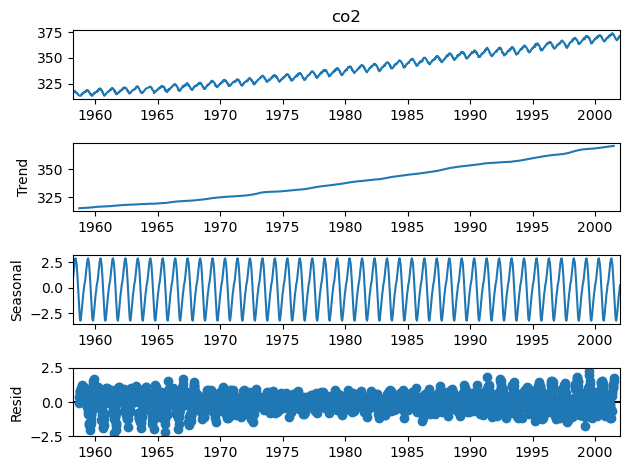

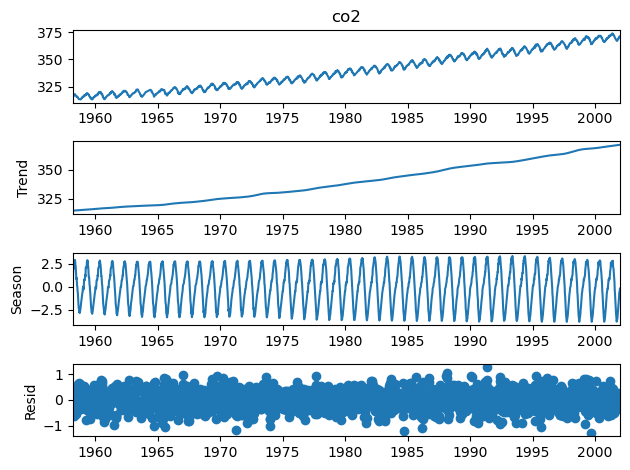

,co2,Trend,Seasonal,Resid
1958-03-29,316.1,314.955083,1.090919,0.053998
1958-04-05,317.3,314.973095,2.144617,0.182289
1958-04-12,317.6,314.991013,2.162617,0.446370
1958-04-19,317.5,315.008835,2.102142,0.389022
1958-04-26,316.4,315.026554,1.985006,-0.611560


In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

# importing the data
dta = sm.datasets.co2.load_pandas().data

# handling missing values
dta.co2.interpolate(inplace=True)



#################### sm.tsa.seasonal_decompose
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(dta.co2)
fig = res.plot()
plt.show()

# dataframe
df1 = dta.copy()
df1[ 'Trend'  ] = res.trend
df1['Seasonal'] = res.seasonal
df1[ 'Resid'  ] = res.resid
df1.head()



#################### Seasonal-Trend decomposition using LOESS (STL)
## https://www.statsmodels.org/dev/examples/notebooks/generated/stl_decomposition.html
from statsmodels.tsa.seasonal import STL
stl = STL(dta.co2, seasonal=13)
#stl = STL(dta.co2, period=12, seasonal_deg=0, trend_deg=1, low_pass_deg=1, robust=True)
res = stl.fit()
fig = res.plot()
plt.show()

# dataframe
df2 = dta.copy()
df2[ 'Trend'  ] = res.trend
df2['Seasonal'] = res.seasonal
df2[ 'Resid'  ] = res.resid
df2.head()


#
# 
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Exponential Smoothing

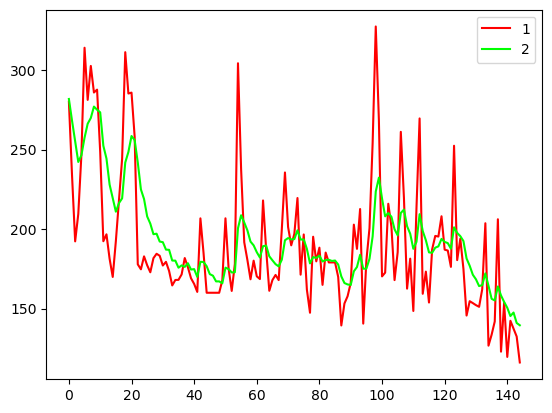

In [29]:
# Single Exponential Smoothing

# Alpha: Smoothing factor for the level.
# Beta: Smoothing factor for the trend.
# Trend Type: Additive or multiplicative.
# Dampen Type: Additive or multiplicative.
# Phi: Damping coefficient.

# single exponential smoothing
'''
...
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# prepare data
data = ...
# create class
model = SimpleExpSmoothing(data)
# fit model
model_fit = model.fit(...)
# make prediction
yhat = model_fit.predict(...)
''' 

import pandas as pd 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Load the time-series data
data = pd.read_csv("household_power_consumption_days.csv")
history = data.Global_reactive_power
 
    
    
model_Simple = SimpleExpSmoothing( 
      endog                 = history
    , initialization_method = 'legacy-heuristic'   # None, 'estimated', 'heuristic', 'legacy-heuristic', 'known'
   #, initial_level         = 0.0 # float   Required if initialization_method = 'known'
    ) 
    
n=int(0.90*len(history))  
model_fit = model_Simple.fit( smoothing_level = 1.00   # no smoothing
                     , optimized=True )   
y1 = model_fit.predict(n)

model_fit = model_Simple.fit( smoothing_level = 0.15   # 25% smoother
                     , optimized = True )  
y2 = model_fit.predict(n)



model_Exp = ExponentialSmoothing( 
      history
    , trend            = 'add'   # 'add'  'mul'  None
    , seasonal         = 'add'   # 'add'  'mul'  None
    , damped_trend     = True    #  True  False
    , seasonal_periods =   2     #  int
    ) 
# fit model
model_fit = model_Exp.fit( optimized   = True
                        #, use_boxcox  = True   # True False
                         , remove_bias = True   # True False
                         )
y3 = model_fit.predict(n)

x = range(len(y1))
marker=None
plt.plot(x,y1,color='red',marker=marker)
#plt.plot(x,y2,color='dodgerblue',marker=marker)
#plt.plot(x,y3,color='green',marker=marker)
plt.plot(x,(y2+y3)/2,color='lime',marker=marker)
plt.legend(['1','2','3','av'])
plt.show()

In [30]:
data = pd.read_csv("household_power_consumption_days.csv")
history = data.Global_active_power
data

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933319
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.666732
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433281
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900043
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800011
...,...,...,...,...,...,...,...,...,...
1437,2010-11-22,2041.536,142.354,345883.85,8660.4,4855.0,2110.0,10136.0,16924.600023
1438,2010-11-23,1577.536,137.450,346428.76,6731.2,1871.0,458.0,7611.0,16352.266679
1439,2010-11-24,1796.248,132.460,345644.59,7559.4,1096.0,2848.0,12224.0,13769.466664
1440,2010-11-25,1431.164,116.128,347812.21,6004.0,1076.0,426.0,5072.0,17278.733338


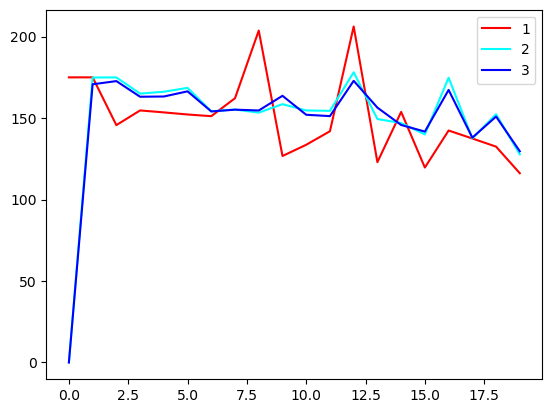

In [31]:
# Single Exponential Smoothing

# Alpha: Smoothing factor for the level.
# Beta: Smoothing factor for the trend.
# Trend Type: Additive or multiplicative.
# Dampen Type: Additive or multiplicative.
# Phi: Damping coefficient.

# single exponential smoothing
'''
...
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# prepare data
data = ...
# create class
model = SimpleExpSmoothing(data)
# fit model
model_fit = model.fit(...)
# make prediction
yhat = model_fit.predict(...)
''' 

import pandas as pd 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

# Load the time-series data
data = pd.read_csv("household_power_consumption_days.csv")
history = data.Global_reactive_power[-20:]
 
n = 0
    
model_Simple = SimpleExpSmoothing( 
      endog                 = history
    , initialization_method = 'legacy-heuristic'   # None, 'estimated', 'heuristic', 'legacy-heuristic', 'known'
   #, initial_level         = 0.0 # float   Required if initialization_method = 'known'
    ) 

model_fit = model_Simple.fit( smoothing_level = 1.00  # no smoothing 
                            , optimized       = True  )   
y1 = model_fit.predict(n)

model_fit = model_Simple.fit( smoothing_level = 0.85  # 85% smoother
                            , optimized       = True  )  
y2 = model_fit.predict(n)



model_Exp = ExponentialSmoothing( 
      history
    , trend            = 'add'   # 'add'  'mul'  None
    , seasonal         = 'add'   # 'add'  'mul'  None
    , damped_trend     = True    #  True  False
    , seasonal_periods =   2     #  int
    ) 
# fit model
model_fit = model_Exp.fit( optimized   = True
                        #, use_boxcox  = True   # True False
                         , remove_bias = True   # True False
                         )
y3 = model_fit.predict(n)


#p: The number of lag observations included in the model, also called the lag order.
#d: The number of times that the raw observations are differenced, also called the degree of differencing.
#q: The size of the moving average window, also called the order of moving average.
p,d,q = 5,1,0
model_ARIMA = ARIMA( 
      y1 #history
    , order=(p,d,q)
    ) 
# fit model
model_fit = model_ARIMA.fit( )
y4 = model_fit.predict(n)
 
model_ARIMA = ARIMA( 
      y2 #history
    , order=(p,d,q)
    ) 
# fit model
model_fit = model_ARIMA.fit( )
y5 = model_fit.predict(n)




x = range(len(y1))
marker=None
plt.plot(x,y1,color='red',marker=marker)
#plt.plot(x,y2,color='dodgerblue',marker=marker)
#plt.plot(x,y3,color='green',marker=marker)
#plt.plot(x,(y2+y3)/2,color='lime',marker=marker)
plt.plot(x,y4,color='cyan',marker=marker)
plt.plot(x,y5,color='blue',marker=marker)
plt.legend(['1','2','3','av']) 
plt.show()

In [32]:
print(len(history), len(y4))

20 20


#
# 
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> ARIMA

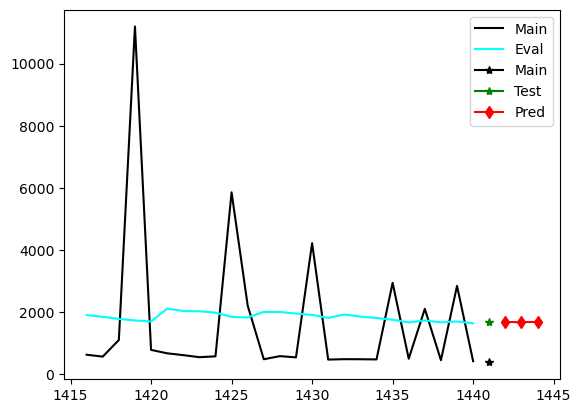

In [33]:
# importing the libraries
import pandas as pd 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   # ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

# reading the Time-Series
data      = pd.read_csv("household_power_consumption_days.csv")
history   = data.Sub_metering_2.values


# smoothing the TimeSeries
model_Simple = SimpleExpSmoothing( 
      endog                 = history
    , initialization_method = 'legacy-heuristic'   # None, 'estimated', 'heuristic', 'legacy-heuristic', 'known'
   #, initial_level         = 0.0 # float          # Required if initialization_method = 'known'
    ) 
model_fit = model_Simple.fit( optimized = True, smoothing_level = 0.05 )   
smoothed_history = model_fit.predict(0)


# Train Eval Test DataSets
nRecords  = len(history)
nTest     = 1
nEval     = 25

Train     = smoothed_history[              : -nEval-nTest ]
Eval      = smoothed_history[ -nEval-nTest :       -nTest ]
Test      = smoothed_history[       -nTest :              ]
TrainEval = smoothed_history[              :       -nTest ]


# optimization on p,d,q
p,d,q = 5,1,1


# Making Estimastor
model_ARIMA = ARIMA( 
      TrainEval
    , order=(p,d,q)
    ) 
# fit model
model_fit  = model_ARIMA.fit()

y1, n1, n2 = [], len(Train), len(TrainEval)
for i in np.arange(n1,n1+1): y1.append( model_fit.predict(i) ) 

y2, n3, n4 = [], len(TrainEval), nRecords
for i in np.arange(n3,n4): y2.append((model_fit.predict(i)[0] ))
    
y3, n5, n6 = [], nRecords, nRecords+3
for i in np.arange(n5,n6): y3.append((model_fit.predict(i)[0] ))
   
    
# Visualizing Performance on Test Data  
plt.plot( range(n1,n2), history[n1:n2], color='k'    ) 
plt.plot( range(n1,n2), y1[0]         , color='cyan' ) 
plt.plot( range(n3,n4), history[n3:n4], color='k', marker='*' ) 
plt.plot( range(n3,n4), y2            , color='g', marker='*' )
plt.plot( range(n5,n6), y3            , color='r', marker='d' )  
plt.legend(['Main','Eval','Main','Test', 'Pred']) 
plt.show()

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> ARIMA Optimizers

In [34]:
# ARIMA Optimizers 

rmse = np.inf
pdq  = (0,0,0)
RMSE = []
for p in np.arange(4,-1,-2):
    for d in np.arange(4,-1,-1):
        for q in np.arange(4,-1,-1):
            print('p, d, q =', [p, d, q])
            # Making Estimastor
            model_ARIMA = ARIMA( TrainEval, order=(p,d,q) ) 
            # fit model
            model_fit = model_ARIMA.fit()
            y = model_fit.predict(0)
            D = np.array(y) - TrainEval 
            rmse_i = (sum(D**2)/len(D))**(0.5)
            if rmse_i < rmse:
                rmse = rmse_i
                pdq  = (p,d,q)
                print( 'pdq, rmse =', pdq, rmse )
                RMSE.append([ np.round(rmse,3), pdq ])

p, d, q = [4, 4, 4]


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pdq, rmse = (4, 4, 4) 189.96250086353672
p, d, q = [4, 4, 3]
pdq, rmse = (4, 4, 3) 186.3308549703161
p, d, q = [4, 4, 2]
pdq, rmse = (4, 4, 2) 185.44740052637087
p, d, q = [4, 4, 1]
p, d, q = [4, 4, 0]
p, d, q = [4, 3, 4]
pdq, rmse = (4, 3, 4) 149.35837758623992
p, d, q = [4, 3, 3]
pdq, rmse = (4, 3, 3) 149.34017844077493
p, d, q = [4, 3, 2]


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


p, d, q = [4, 3, 1]
p, d, q = [4, 3, 0]
p, d, q = [4, 2, 4]


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pdq, rmse = (4, 2, 4) 129.16370453467317
p, d, q = [4, 2, 3]


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p, d, q = [4, 2, 2]


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p, d, q = [4, 2, 1]
p, d, q = [4, 2, 0]
p, d, q = [4, 1, 4]


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pdq, rmse = (4, 1, 4) 122.58968649249702
p, d, q = [4, 1, 3]


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pdq, rmse = (4, 1, 3) 122.4683143792267
p, d, q = [4, 1, 2]


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p, d, q = [4, 1, 1]
p, d, q = [4, 1, 0]
p, d, q = [4, 0, 4]


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pdq, rmse = (4, 0, 4) 101.06402347921144
p, d, q = [4, 0, 3]


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p, d, q = [4, 0, 2]


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p, d, q = [4, 0, 1]
p, d, q = [4, 0, 0]
p, d, q = [2, 4, 4]
p, d, q = [2, 4, 3]
p, d, q = [2, 4, 2]
p, d, q = [2, 4, 1]
p, d, q = [2, 4, 0]
p, d, q = [2, 3, 4]
p, d, q = [2, 3, 3]
p, d, q = [2, 3, 2]
p, d, q = [2, 3, 1]
p, d, q = [2, 3, 0]
p, d, q = [2, 2, 4]


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p, d, q = [2, 2, 3]


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p, d, q = [2, 2, 2]


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p, d, q = [2, 2, 1]
p, d, q = [2, 2, 0]
p, d, q = [2, 1, 4]


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p, d, q = [2, 1, 3]


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p, d, q = [2, 1, 2]
p, d, q = [2, 1, 1]
p, d, q = [2, 1, 0]
p, d, q = [2, 0, 4]
p, d, q = [2, 0, 3]
p, d, q = [2, 0, 2]
p, d, q = [2, 0, 1]
p, d, q = [2, 0, 0]
p, d, q = [0, 4, 4]


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p, d, q = [0, 4, 3]


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p, d, q = [0, 4, 2]
p, d, q = [0, 4, 1]
p, d, q = [0, 4, 0]
p, d, q = [0, 3, 4]
p, d, q = [0, 3, 3]
p, d, q = [0, 3, 2]
p, d, q = [0, 3, 1]
p, d, q = [0, 3, 0]
p, d, q = [0, 2, 4]
p, d, q = [0, 2, 3]
p, d, q = [0, 2, 2]
p, d, q = [0, 2, 1]
p, d, q = [0, 2, 0]
p, d, q = [0, 1, 4]
p, d, q = [0, 1, 3]
p, d, q = [0, 1, 2]
p, d, q = [0, 1, 1]
p, d, q = [0, 1, 0]
p, d, q = [0, 0, 4]
p, d, q = [0, 0, 3]
p, d, q = [0, 0, 2]
p, d, q = [0, 0, 1]
p, d, q = [0, 0, 0]


In [35]:
RMSE

[[189.963, (4, 4, 4)],
 [186.331, (4, 4, 3)],
 [185.447, (4, 4, 2)],
 [149.358, (4, 3, 4)],
 [149.34, (4, 3, 3)],
 [129.164, (4, 2, 4)],
 [122.59, (4, 1, 4)],
 [122.468, (4, 1, 3)],
 [101.064, (4, 0, 4)]]

In [36]:
pdq

(4, 0, 4)

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Making Estimastor

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


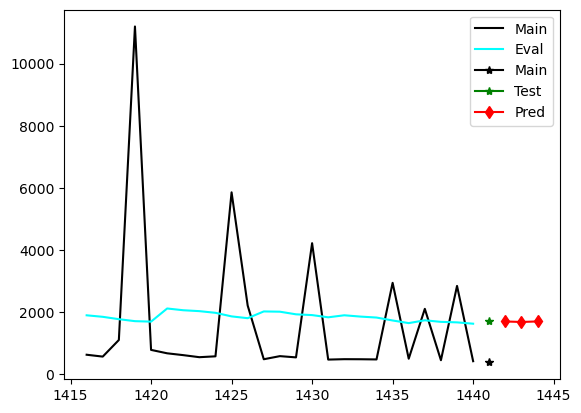

In [37]:
# Making Estimastor
model_ARIMA = ARIMA( TrainEval, order=pdq )
# fit model
model_fit  = model_ARIMA.fit()

y1, n1, n2 = [], len(Train), len(TrainEval)
for i in np.arange(n1,n1+1): y1.append( model_fit.predict(i) ) 

y2, n3, n4 = [], len(TrainEval), nRecords
for i in np.arange(n3,n4): y2.append((model_fit.predict(i)[0] ))
    
y3, n5, n6 = [], nRecords, nRecords+3
for i in np.arange(n5,n6): y3.append((model_fit.predict(i)[0] ))
   
    
# Visualizing Performance on Test Data  
plt.plot( range(n1,n2), history[n1:n2], color='k'    ) 
plt.plot( range(n1,n2), y1[0]         , color='cyan' ) 
plt.plot( range(n3,n4), history[n3:n4], color='k', marker='*' ) 
plt.plot( range(n3,n4), y2            , color='g', marker='*' )
plt.plot( range(n5,n6), y3            , color='r', marker='d' )  
plt.legend(['Main','Eval','Main','Test', 'Pred']) 
plt.show()

#####   

#####   